# Logistic regression and EDA



## Imports

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from patsy import dmatrices
#from mlxtend.feature_selection import SequentialFeatureSelector

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# EDA

In [2]:
all_df = pd.read_csv('../datasets/mushrooms.csv', index_col=False)
all_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
all_df.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


## Class

In [4]:
all_df['class'] = all_df['class'].apply(lambda x:'Edible' if 'e' in x else 'Poisonous')


[Text(0, 0, '3916'), Text(0, 0, '4208')]

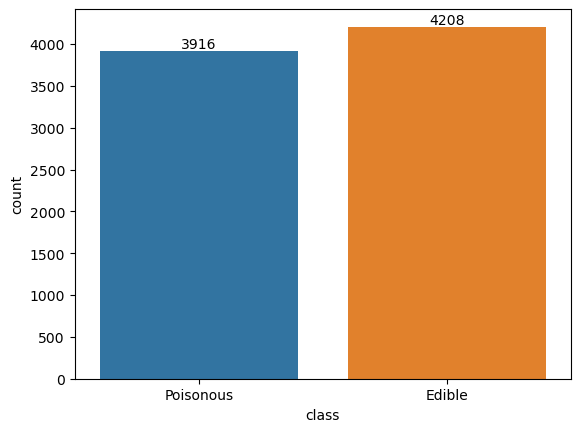

In [5]:
ax = sns.countplot(x=all_df['class'])
ax.bar_label(ax.containers[0])

## Cap-shape

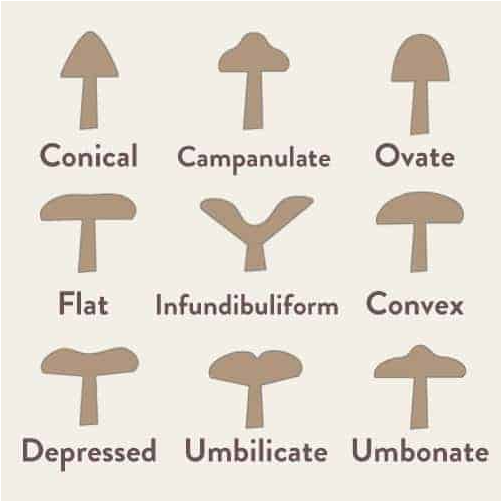

Source: https://www.realmushrooms.com/mushroom-anatomy-parts/#:~:text=The%20shape%20of%20a%20mushroom%20cap%20is%20unique,and%20then%20become%20more%20expanded%20as%20it%20matures.

[Text(0, 0, 'convex'),
 Text(1, 0, 'bell'),
 Text(2, 0, 'sunken'),
 Text(3, 0, 'flat'),
 Text(4, 0, 'knobbed'),
 Text(5, 0, 'conical')]

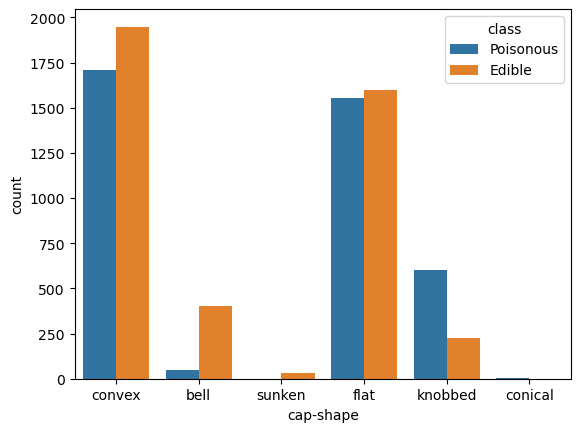

In [6]:
ax = sns.countplot(x=all_df['cap-shape'], hue=all_df['class'])
ax.set_xticklabels(('convex', 'bell','sunken','flat','knobbed','conical'))

## Cap-surface



[Text(0, 0, 'smooth'),
 Text(1, 0, 'Scaly'),
 Text(2, 0, 'fibrous'),
 Text(3, 0, 'grooves')]

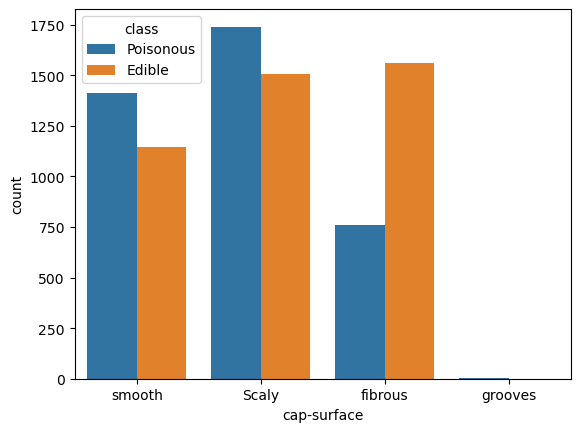

In [7]:
ax = sns.countplot(x=all_df['cap-surface'], hue=all_df['class'])
ax.set_xticklabels(('smooth', 'Scaly','fibrous','grooves'))

## Cap-colour


[Text(0, 0, 'brown'),
 Text(0, 1, 'yellow'),
 Text(0, 2, 'white'),
 Text(0, 3, 'gray'),
 Text(0, 4, 'red'),
 Text(0, 5, 'pink'),
 Text(0, 6, ' buff'),
 Text(0, 7, 'purple'),
 Text(0, 8, 'cinnamon'),
 Text(0, 9, 'green')]

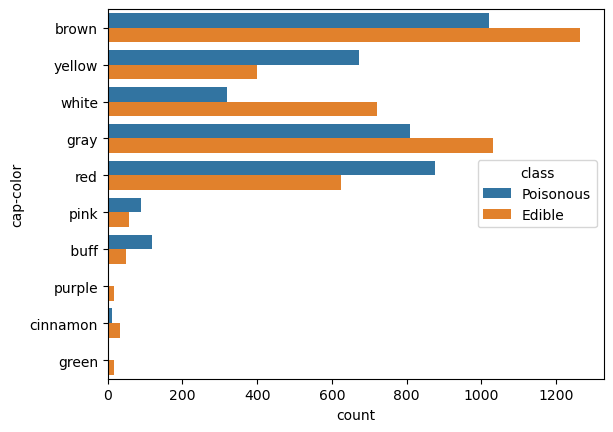

In [8]:
ax = sns.countplot(y=all_df['cap-color'], hue=all_df['class'])
ax.set_yticklabels(('brown', 'yellow','white','gray','red','pink',' buff', 'purple', 'cinnamon', 'green'))

## Bruises

[Text(0, 0, 'Bruises'), Text(1, 0, 'no-bruises')]

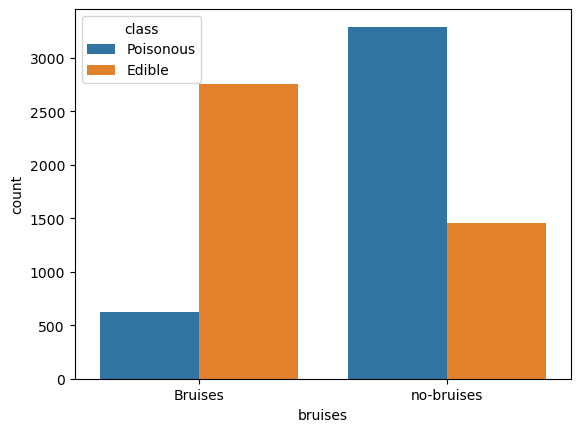

In [9]:
ax = sns.countplot(x=all_df['bruises'], hue=all_df['class'])
ax.set_xticklabels(('Bruises','no-bruises'))

## Odor

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

[Text(0, 0, 'pungent'),
 Text(0, 1, 'almond'),
 Text(0, 2, 'anise'),
 Text(0, 3, 'none'),
 Text(0, 4, 'foul'),
 Text(0, 5, 'creosote'),
 Text(0, 6, 'fishy'),
 Text(0, 7, 'spicy'),
 Text(0, 8, 'musty')]

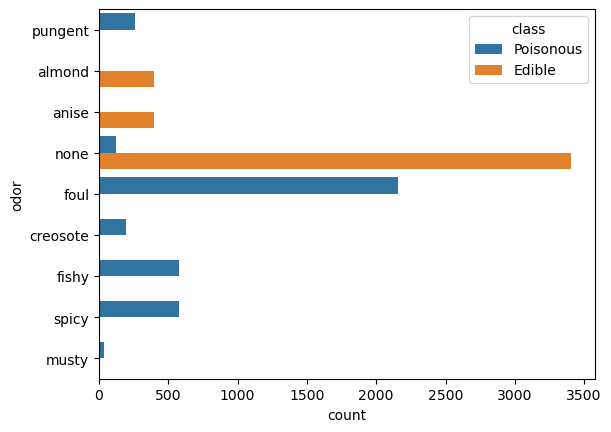

In [10]:
ax = sns.countplot(y=all_df['odor'], hue=all_df['class'])
ax.set_yticklabels(('pungent','almond', 'anise', 'none', 'foul', 'creosote', 'fishy', 'spicy', 'musty'))

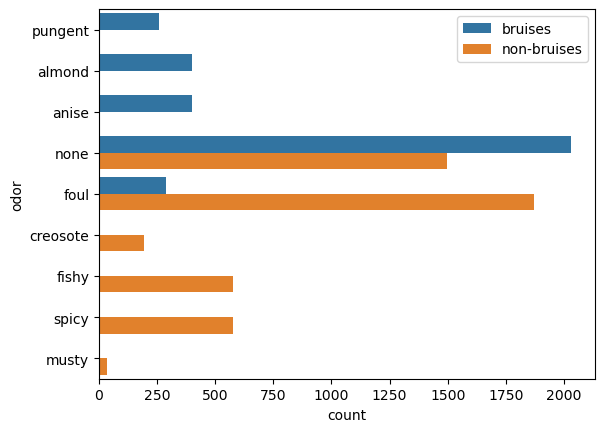

In [11]:
ax = sns.countplot(y=all_df['odor'], hue=all_df['bruises'])
ax.set_yticklabels(('pungent','almond', 'anise', 'none', 'foul', 'creosote', 'fishy', 'spicy', 'musty'))
ax.legend(labels=('bruises', 'non-bruises'))

# Pre-processing

Label encoding is suitable for ordinal categorical data, where the categories have a clear order or ranking. For example, education levels like "High School," "Bachelor's," "Master's," "Ph.D." can be encoded as 0, 1, 2, 3.
Or when you have binary categorical features (only two unique values), you can use label encoding as well, as it will convert them into 0 and 1.

When dealing with nominal categorical data, where categories don't have a specific order or ranking, one-hot encoding is generally more appropriate. Each category becomes a binary column, and each observation is represented by a 1 in the corresponding column and 0s elsewhere. 

Preventing misinterpretation using label encoding with nominal data can mislead models into thinking there's a meaningful order among the categories when there isn't, potentially leading to incorrect results.

Linear models, such as logistic regression, typically require one-hot encoding for nominal categorical features. These models assume that the input features are numeric and have a linear relationship with the target variable.

One-hot encoding can significantly increase the dimensionality of your dataset, which might lead to the curse of dimensionality if you have many unique categories. In such cases, you may need to use techniques like feature selection or dimensionality reduction.

So we will use One-hot encoding or dummey labels for the training data and we will use label encoding for our labels.

In [12]:
y = all_df['class']
X = all_df.drop(labels =['class'],axis=1)

In [13]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [14]:
X = pd.get_dummies(X)
X.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [15]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=3, stratify=y_train)

In [17]:
y_train

array([0, 1, 0, ..., 1, 0, 1])

# Model

In [22]:
class LogisticRegression:
    def __init__(self, learning_rate=0.001, n_iters=1000, lambda_param=0.1):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.lambda_param = lambda_param
        
        
   

    def fit(self, X, y, single_feature= False):
        n_samples, n_features = X.shape 

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            # approximate y with linear combination of weights and x, plus bias
            linear_model = np.dot(X, self.weights) + self.bias
            # apply sigmoid function
            y_predicted = self._sigmoid(linear_model)

            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))+(self.lambda_param / n_samples) * np.sign(self.weights)
            db = (1 / n_samples) * np.sum(y_predicted - y)+(self.lambda_param / n_samples) * np.sign(self.bias)
            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
        

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))


In [23]:
def accuracy_score(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

## Hyperparameter tuning

In [24]:
learning_rates=[0.1,0.01,0.001,0.0001]
def hypTune(X_train, y_train, X_val, y_val):
    scores = []
    for lr in learning_rates:
        logReg = LogisticRegression(lr)
        logReg.fit(X_train, y_train)
        predict = logReg.predict(X_val)
        acc = accuracy_score(y_val, predict)
        scores.append(acc)
    return scores

In [25]:
scores = hypTune(X_train, y_train, X_val, y_val)
scores

[0.984182776801406, 0.9420035149384886, 0.883128295254833, 0.8892794376098418]

## Training

In [26]:
LR = LogisticRegression(0.1)
LR.fit(X_train, y_train)

In [27]:
predict = LR.predict(X_val)
predict

array([0, 0, 1, ..., 0, 0, 0])

In [28]:
accuracy_score(y_val, predict)

0.984182776801406

In [29]:
def cross_validation(X, y, model, k=5):
    """
    Perform k-fold cross-validation for a given model.

    Parameters:
        X (numpy.ndarray): Feature matrix.
        y (numpy.ndarray): Target vector.
        model: Your custom logistic regression model.
        k (int): Number of folds for cross-validation.

    Returns:
        List of accuracy scores for each fold.
    """
    n = len(X)
    fold_size = n // k
    accuracy_scores = []

    for i in range(k):
        # Split data into training and validation sets
        start, end = i * fold_size, (i + 1) * fold_size
        X_train = np.concatenate((X[:start], X[end:]), axis=0)
        y_train = np.concatenate((y[:start], y[end:]), axis=0)
        X_val, y_val = np.array(X[start:end]), np.array(y[start:end])
        # Fit the model on the training data
        model.fit(X_train, y_train)

        # Make predictions on the validation data
        y_pred = model.predict(X_val)

        # Calculate accuracy and store it
        accuracy = accuracy_score(y_val, y_pred)
        accuracy_scores.append(accuracy)

    return accuracy_scores

In [30]:
# Using cross-validation to get accuracy
accuracy = cross_validation(X_train, y_train, LR, k=5)
np.average(accuracy)
#accuracies.append(np.average(accuracy))

0.9874587458745875

# Evaluation

In [31]:
predict = LR.predict(X_test)

In [32]:
accuracy = accuracy_score(y_test, predict)
accuracy

0.9819524200164069

In [33]:
# We use confusion matrix (TP, TN, FP, FN) to visualise the performance

from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, predict)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1263
           1       0.99      0.97      0.98      1175

    accuracy                           0.98      2438
   macro avg       0.98      0.98      0.98      2438
weighted avg       0.98      0.98      0.98      2438



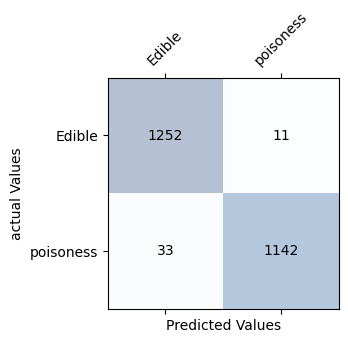

In [34]:
# Plot confusion matrix
fig, ax = plt.subplots(figsize=(3,3))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i,j], va='center', ha='center')
classes=["Edible", "poisoness"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Values',)
plt.ylabel('actual Values',);
print(classification_report(y_test, predict))

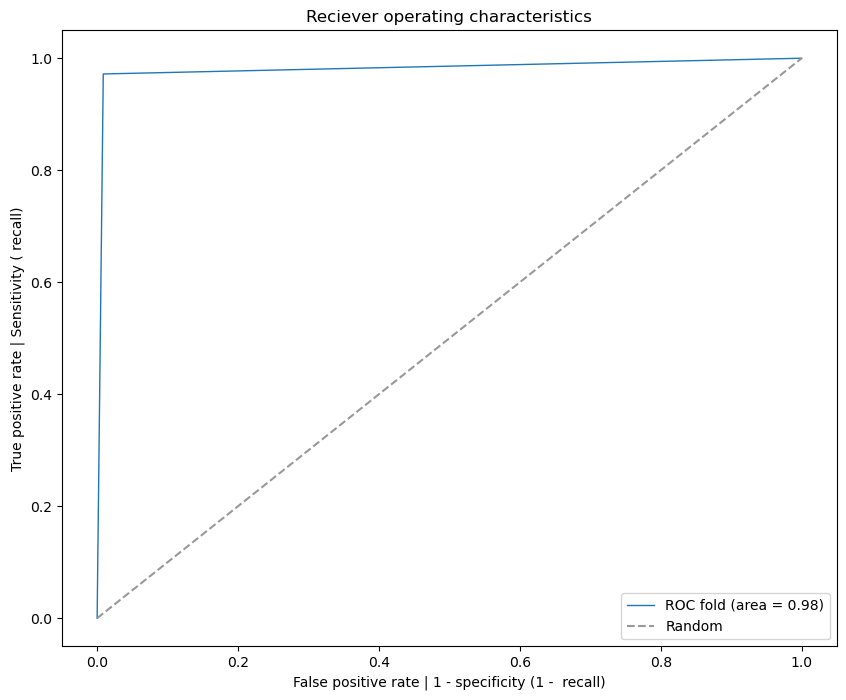

In [35]:
# Plot the rciever opertaing characteristic curve (ROC)
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10,8))
#probas_ = model.predict(X_valid['speed'])
fpr, tpr, thresholds = roc_curve(y_test, predict)
roc_auc = auc(fpr,tpr)
plt.plot(fpr,tpr, lw=1, label='ROC fold (area = %0.2f)' %(roc_auc))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False positive rate | 1 - specificity (1 -  recall)')
plt.ylabel('True positive rate | Sensitivity ( recall)')
plt.title('Reciever operating characteristics')
plt.legend(loc="lower right")
#plt.axes().set_aspect(1);

In [36]:
X_train.columns[20:]


Index(['bruises_f', 'bruises_t', 'odor_a', 'odor_c', 'odor_f', 'odor_l',
       'odor_m', 'odor_n', 'odor_p', 'odor_s', 'odor_y', 'gill-attachment_a',
       'gill-attachment_f', 'gill-spacing_c', 'gill-spacing_w', 'gill-size_b',
       'gill-size_n', 'gill-color_b', 'gill-color_e', 'gill-color_g',
       'gill-color_h', 'gill-color_k', 'gill-color_n', 'gill-color_o',
       'gill-color_p', 'gill-color_r', 'gill-color_u', 'gill-color_w',
       'gill-color_y', 'stalk-shape_e', 'stalk-shape_t', 'stalk-root_?',
       'stalk-root_b', 'stalk-root_c', 'stalk-root_e', 'stalk-root_r',
       'stalk-surface-above-ring_f', 'stalk-surface-above-ring_k',
       'stalk-surface-above-ring_s', 'stalk-surface-above-ring_y',
       'stalk-surface-below-ring_f', 'stalk-surface-below-ring_k',
       'stalk-surface-below-ring_s', 'stalk-surface-below-ring_y',
       'stalk-color-above-ring_b', 'stalk-color-above-ring_c',
       'stalk-color-above-ring_e', 'stalk-color-above-ring_g',
       'stalk-color-

In [37]:
sel_features = X_train[['bruises_f', 'bruises_t', 'odor_a', 'odor_c', 'odor_f', 'odor_l',
       'odor_m', 'odor_n', 'odor_p', 'odor_s', 'odor_y']]
sel_features

,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y
2357,0,1,0,0,0,0,0,1,0,0,0
6683,1,0,0,0,1,0,0,0,0,0,0
7500,1,0,0,0,0,0,0,1,0,0,0
3568,0,1,0,0,0,0,0,1,0,0,0
1597,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1677,1,0,0,0,0,0,0,1,0,0,0
734,0,1,0,0,0,1,0,0,0,0,0
5084,1,0,0,0,1,0,0,0,0,0,0
2961,0,1,0,0,0,0,0,1,0,0,0


In [38]:
accuracy = cross_validation(sel_features, y_train, LR, k=5)
np.average(accuracy)

0.9881188118811881